# Assignment
---
Read about (Susanna Epp pp. 704):
1. Kruskal's Algorithm
2. Prim's Algorithm
3. Djitraka's Shortest Path Algorithm

Given the following graph, implement the algorithm in Python.

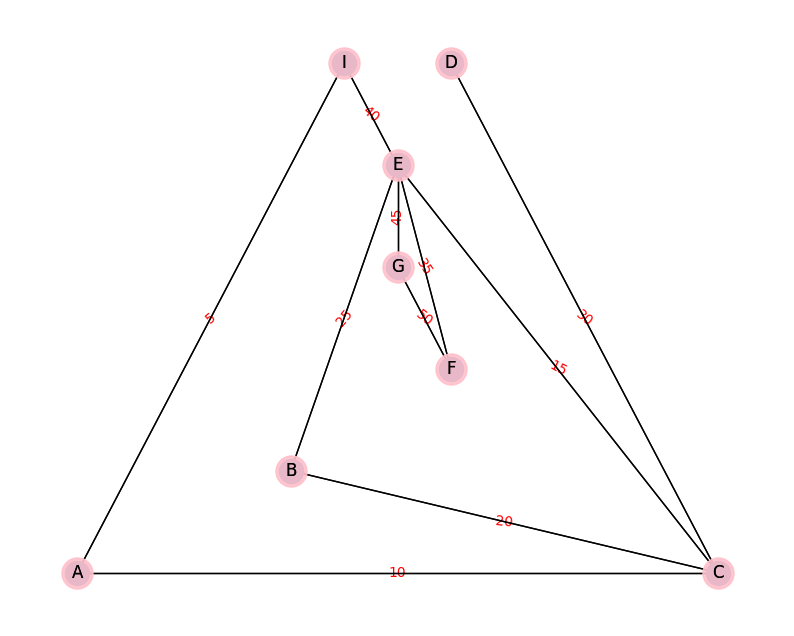

In [14]:
import matplotlib.pyplot as plt
import networkx as nx
seed = 55
# Use seed for reproducibility
G = nx.Graph()
plt.figure(figsize=(10, 8))
# Add nodes
G.add_nodes_from(["A","B","C","D","E","F","G"])
# Add self-loops to the remaining nodes
edgelist = [("A","C"),("A","I"),("C","B"),("C","E"),("C","D"),("B","E"),("I","E"),("E","F"),("F","G"),("G","E")]
G.add_edges_from(edgelist)
pos = nx.planar_layout(G)  # Seed for reproducible layout
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels={("A","C"):10,("A","I"):5,("C","B"):20,("C","E"):15,("C","D"):30,("B","E"):25,("I","E"):40,("E","F"):35,("F","G"):50,("G","E"):45},
    font_color='red'
)
nx.draw(G, pos=pos,with_labels=True)
nx.draw(
    G, pos, edge_color='black', width=1, linewidths=1,
    node_size=500, node_color='pink', alpha=0.9,
    with_labels=True)

plt.show()

In [5]:
def kruskal_algorithm(G):
    edges = sorted(G.edges(data=True), key=lambda x: x[2]['weight'])
    MST = nx.Graph()
    components = {node: {node} for node in G.nodes()}
    
    for edge in edges:
        u, v, weight = edge
        
        if components[u] != components[v]:
            MST.add_edge(u, v, weight=weight['weight'])
            components[u].update(components[v])
            for node in components[v]:
                components[node] = components[u]
    
    return MST


1. Kruskal's Algorithm

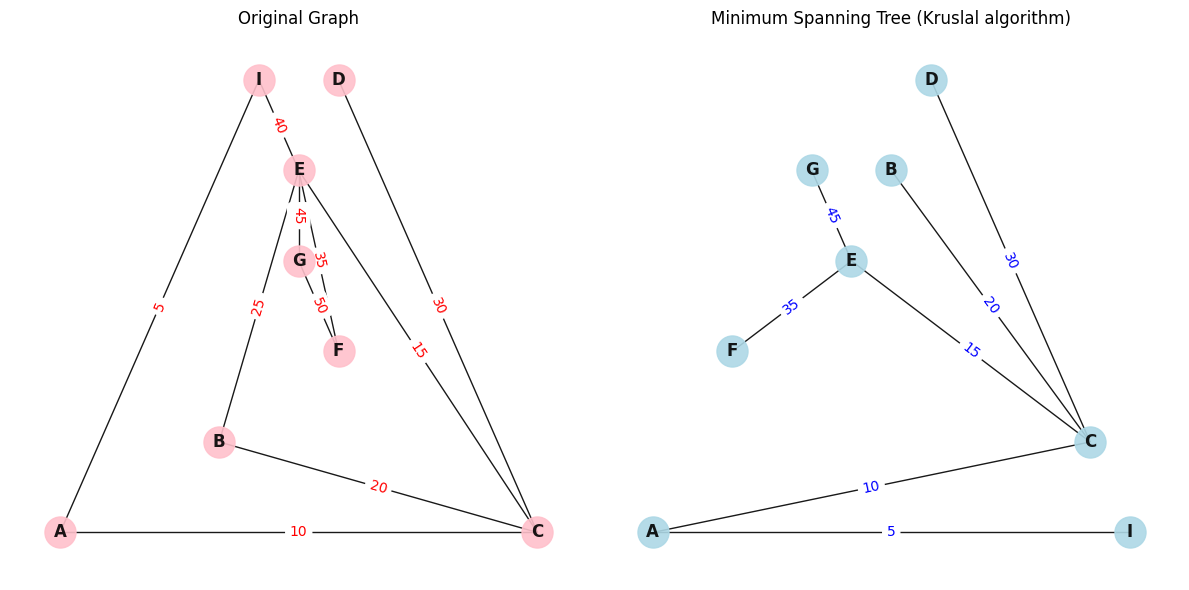

In [10]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()
G.add_nodes_from(["A", "B", "C", "D", "E", "F", "G"])
edgelist = [
    ("A", "C", {"weight": 10}), ("A", "I", {"weight": 5}),
    ("C", "B", {"weight": 20}), ("C", "E", {"weight": 15}),
    ("C", "D", {"weight": 30}), ("B", "E", {"weight": 25}),
    ("I", "E", {"weight": 40}), ("E", "F", {"weight": 35}),
    ("F", "G", {"weight": 50}), ("G", "E", {"weight": 45})
]
G.add_edges_from(edgelist)

# Find the minimum spanning tree using Kruskal's algorithm
MST = kruskal_algorithm(G)

# Visualize the original graph
plt.figure(figsize=(12, 6))
plt.subplot(121)
pos = nx.planar_layout(G)
nx.draw(G, pos=pos, with_labels=True, node_size=500, node_color='pink', alpha=0.9, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['weight'] for u, v, d in G.edges(data=True)}, font_color='red')
plt.title('Original Graph')

# Visualize the minimum spanning tree
plt.subplot(122)
pos_mst = nx.planar_layout(MST)
nx.draw(MST, pos=pos_mst, with_labels=True, node_size=500, node_color='lightblue', alpha=0.9, font_weight='bold')
nx.draw_networkx_edge_labels(MST, pos_mst, edge_labels={(u, v): d['weight'] for u, v, d in MST.edges(data=True)}, font_color='blue')
plt.title('Minimum Spanning Tree (Kruslal algorithm)')

plt.tight_layout()
plt.show()


In [18]:
# Print the edges of the minimum spanning tree found by Kruskal's algorithm
print("Edges of the minimum spanning tree (Kruskal's algorithm):")
for edge in MST.edges(data=True):
    print(edge)


Edges of the minimum spanning tree (Kruskal's algorithm):
('A', 'I', {'weight': 5})
('A', 'C', {'weight': 10})
('C', 'E', {'weight': 15})
('C', 'B', {'weight': 20})
('C', 'D', {'weight': 30})
('E', 'F', {'weight': 35})
('E', 'G', {'weight': 45})


In [2]:
import heapq

def prim_algorithm(G):
    # Initialize an empty graph for the minimum spanning tree
    MST = nx.Graph()
    
    # Choose an arbitrary starting node
    start_node = next(iter(G.nodes()))
    
    # Initialize a set to keep track of visited nodes and a priority queue
    visited = set()
    pq = [(0, start_node, None)]  # (weight, node, parent)
    
    # Main loop
    while pq:
        # Pop the edge with the minimum weight
        weight, node, parent = heapq.heappop(pq)
        
        # Check if the node has been visited
        if node not in visited:
            # Add the node to the minimum spanning tree and mark it as visited
            if parent is not None:
                MST.add_edge(parent, node, weight=weight)
            visited.add(node)
            
            # Add all adjacent edges to the priority queue
            for neighbor, attr in G[node].items():
                if neighbor not in visited:
                    heapq.heappush(pq, (attr['weight'], neighbor, node))
    
    return MST


2.  Prim's Algorithm

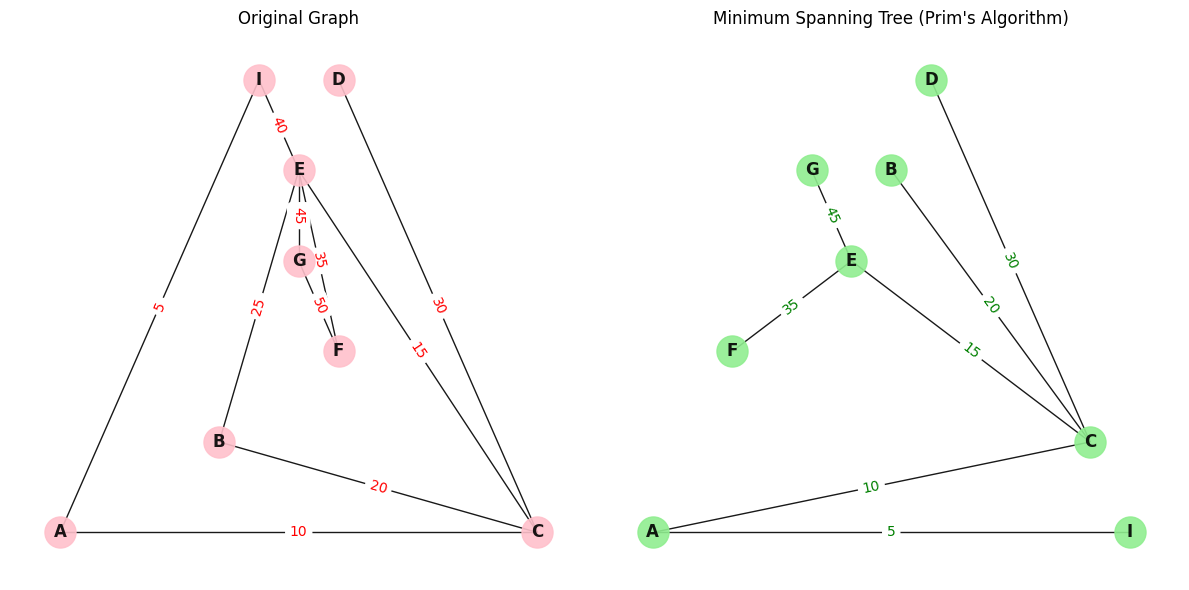

In [3]:
# Create the graph
G = nx.Graph()
G.add_nodes_from(["A", "B", "C", "D", "E", "F", "G"])
edgelist = [
    ("A", "C", {"weight": 10}), ("A", "I", {"weight": 5}),
    ("C", "B", {"weight": 20}), ("C", "E", {"weight": 15}),
    ("C", "D", {"weight": 30}), ("B", "E", {"weight": 25}),
    ("I", "E", {"weight": 40}), ("E", "F", {"weight": 35}),
    ("F", "G", {"weight": 50}), ("G", "E", {"weight": 45})
]
G.add_edges_from(edgelist)

# Find the minimum spanning tree using Prim's algorithm
MST_prim = prim_algorithm(G)

# Visualize the original graph
plt.figure(figsize=(12, 6))
plt.subplot(121)
pos = nx.planar_layout(G)
nx.draw(G, pos=pos, with_labels=True, node_size=500, node_color='pink', alpha=0.9, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['weight'] for u, v, d in G.edges(data=True)}, font_color='red')
plt.title('Original Graph')

# Visualize the minimum spanning tree
plt.subplot(122)
pos_mst = nx.planar_layout(MST_prim)
nx.draw(MST_prim, pos=pos_mst, with_labels=True, node_size=500, node_color='lightgreen', alpha=0.9, font_weight='bold')
nx.draw_networkx_edge_labels(MST_prim, pos_mst, edge_labels={(u, v): d['weight'] for u, v, d in MST_prim.edges(data=True)}, font_color='green')
plt.title('Minimum Spanning Tree (Prim\'s Algorithm)')

plt.tight_layout()
plt.show()


In [5]:
import heapq

def dijkstra_shortest_path(G, start):
    # Initialize distances dictionary with infinity for all nodes except the start node
    distances = {node: float('inf') for node in G.nodes()}
    distances[start] = 0
    
    # Initialize priority queue (min-heap) with (distance, node) tuples
    pq = [(0, start)]
    
    # Main loop
    while pq:
        # Pop the node with the minimum distance from the priority queue
        distance, node = heapq.heappop(pq)
        
        # Iterate through neighbors of the current node
        for neighbor, attr in G[node].items():
            # Calculate the new distance to the neighbor
            new_distance = distance + attr['weight']
            
            # Update the distance if a shorter path is found
            if new_distance < distances[neighbor]:
                distances[neighbor] = new_distance
                
                # Add the neighbor to the priority queue
                heapq.heappush(pq, (new_distance, neighbor))
    
    return distances


3. Djitraka's Shortest Path Algorithm

Shortest paths and distances from node A to other nodes:
To node I : A -> I (distance: 5)
To node C : A -> C (distance: 10)
To node E : A -> C -> E (distance: 25)
To node B : A -> C -> B (distance: 30)
To node D : A -> C -> D (distance: 40)
To node F : A -> C -> E -> F (distance: 60)
To node G : A -> C -> E -> G (distance: 70)


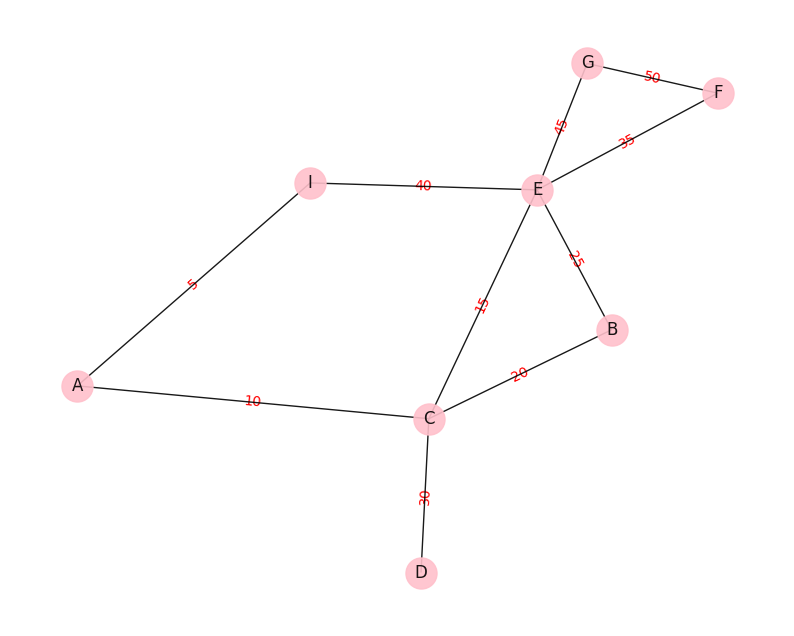

In [9]:
import matplotlib.pyplot as plt
import networkx as nx

# Define the graph
G = nx.Graph()
edgelist = [("A", "C", 10), ("A", "I", 5), ("C", "B", 20), ("C", "E", 15), 
            ("C", "D", 30), ("B", "E", 25), ("I", "E", 40), ("E", "F", 35), 
            ("F", "G", 50), ("G", "E", 45)]

G.add_weighted_edges_from(edgelist)

# Define the start node
start_node = "A"

# Calculate shortest paths and distances
shortest_paths = nx.single_source_dijkstra_path_length(G, start_node)
shortest_paths_nodes = nx.single_source_dijkstra_path(G, start_node)

# Print shortest paths and distances
print("Shortest paths and distances from node", start_node, "to other nodes:")
for node, distance in shortest_paths.items():
    if node != start_node:
        path = shortest_paths_nodes[node]
        print(f"To node {node} : {' -> '.join(path)} (distance: {distance})")

# Plot the graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=55)  # Seed for reproducible layout

nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels={(u, v): d['weight'] for u, v, d in G.edges(data=True)},
    font_color='red'
)
nx.draw(G, pos=pos, with_labels=True, node_color='pink', node_size=500, edge_color='black', width=1, linewidths=1, alpha=0.9)

plt.show()
